In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# create the dataframe 
cars = pd.read_csv('data/CarPrice.csv')

# print the df
cars 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [10]:
dummies_df = pd.get_dummies(cars[["symboling","fueltype","aspiration","doornumber","carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber"]])
dummies_df

,symboling,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,2,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
201,-1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
202,-1,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
203,-1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
# create the final df 
final = pd.concat([cars, dummies_df],axis=1)

final = final.drop(["CarName","symboling","fueltype","aspiration","doornumber","carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber","fuelsystem"],axis=1)
final 

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,1,0,0,0,0,1,0,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,1,0,0,0,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,1,0,0,0,0
201,202,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,1,0,0,0,0
202,203,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,1,0,0,0,0,1,0,0,0
203,204,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
X = np.array(final.drop(columns=["price"], axis=1))
y = np.array(final['price'])

In [13]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# I need list 
y_pred_list, y_true_list = list(), list() 

# make linear regression 
regressor = KNeighborsRegressor()
loo = LeaveOneOut() 

# ctn to show the results
ctn = 0 

for train_index, test_index in loo.split(X):
    # split the data
    X_train = X[train_index, :] 
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    # fit the data 
    regressor.fit(X_train, y_train)
    
    # making prediction
    prediction = regressor.predict(X_test)

    y_pred_list.append(prediction[0])
    y_true_list.append(y_test[0]) 

# Evaluating Model's Performance
score=r2_score(y_true_list, y_pred_list)
print('Score: ', score)
print('Mean Squared Error:', mean_squared_error(y_true_list, y_pred_list))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_true_list, y_pred_list)))

Score:  0.8415270853240342
Mean Squared Error: 10064683.891341422
Mean Root Squared Error: 3172.488595935598


Text(0.5, 1.0, 'Actual vs. Prediction')

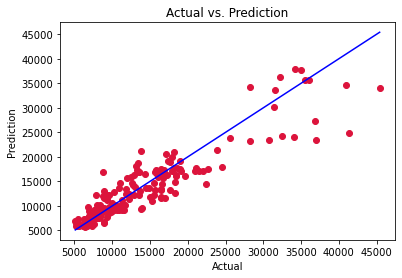

In [14]:
plt.scatter(x=y_true_list, y=y_pred_list, c='crimson')
p1 = max(max(y_pred_list), max(y_true_list))
p2 = min(min(y_pred_list), min(y_true_list))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')